# LSTM(Long Short-Term Memory) 구조

<img src = "./image/rnn_lstm.jpg" height = 500 width = 500>

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src = "./image/lstm.png" width = 600 height = 600>

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후에 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
        
- LSTM은 순환 되는 상태가 2개
    - 은닉 상태(hidden state)
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
        
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
        
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력값과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [3]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2,
                                                  stratify = y_train,
                                                  random_state = 5)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [5]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- LSTM 셀 파라미터 개수
    - ((8 * 8) + (16 * 8) + 8) * 4 = 800

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.h5",
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [12]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                    validation_data = (val_seq, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100


313/313 [==============================] - 12s 32ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6923 - val_accuracy: 0.5602
Epoch 2/100
  3/313 [..............................] - ETA: 12s - loss: 0.6923 - accuracy: 0.5521

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 26ms/step - loss: 0.6917 - accuracy: 0.5774 - val_loss: 0.6909 - val_accuracy: 0.5992
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6897 - accuracy: 0.6066 - val_loss: 0.6879 - val_accuracy: 0.6194
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6851 - accuracy: 0.6231 - val_loss: 0.6811 - val_accuracy: 0.6348
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6719 - accuracy: 0.6465 - val_loss: 0.6583 - val_accuracy: 0.6672
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6253 - accuracy: 0.7040 - val_loss: 0.6021 - val_accuracy: 0.7148
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5866 - accuracy: 0.7273 - val_loss: 0.5786 - val_accuracy: 0.7322
Epoch 8/100
313/313 [==============================] - 9s 27ms/step - loss: 0.5644 - accuracy: 0.7443 - val_loss: 0.5593 - val_accuracy: 0.7460
Epoc

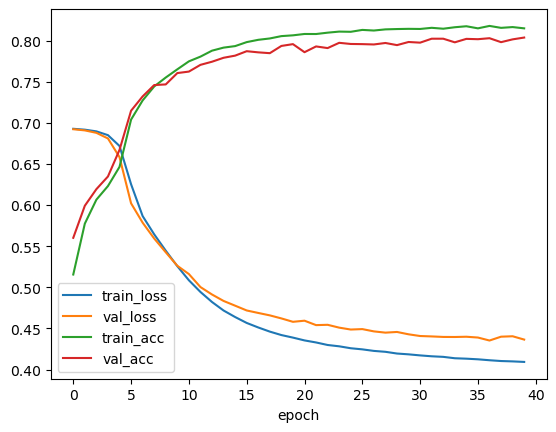

In [13]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout이 GPU를 사용하지 못하는 경우가 있음

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.h5",
                                                save_best_only = True)

In [17]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6928 - accuracy: 0.5219 - val_loss: 0.6923 - val_accuracy: 0.5564
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6921 - accuracy: 0.5406

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 28ms/step - loss: 0.6917 - accuracy: 0.5584 - val_loss: 0.6909 - val_accuracy: 0.5986
Epoch 3/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6896 - accuracy: 0.5986 - val_loss: 0.6878 - val_accuracy: 0.6228
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6847 - accuracy: 0.6307 - val_loss: 0.6802 - val_accuracy: 0.6416
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6694 - accuracy: 0.6647 - val_loss: 0.6531 - val_accuracy: 0.6852
Epoch 6/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6189 - accuracy: 0.6982 - val_loss: 0.5955 - val_accuracy: 0.7056
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5859 - accuracy: 0.7139 - val_loss: 0.5776 - val_accuracy: 0.7254
Epoch 8/100
313/313 [==============================] - 9s 27ms/step - loss: 0.5691 - accuracy: 0.7298 - val_loss: 0.5595 - val_accuracy: 0.7356
Epoc

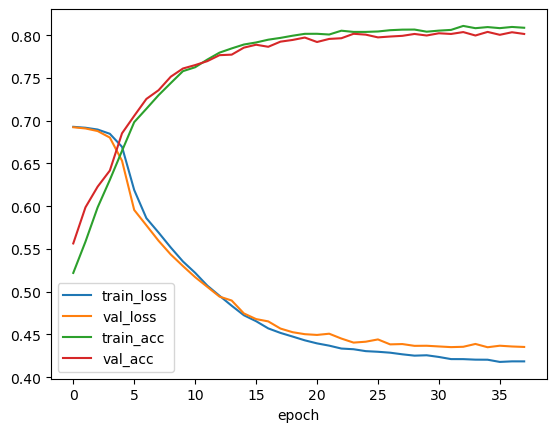

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때의 주의점
    - 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함
            - return_sequences 매개변수를 True로 지정

In [19]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 첫 번째 LSTM
    - 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
    - 파라미터 수
        - ((16 * 8) + (8 * 8) + 8) * 4 = 800
    
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉상태만 출력하기 때문에 출력의 크기가 (None, 8)
    - 파라미터 수
        - ((8 * 8) + (8 * 8) + 8) * 4 = 544

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.h5",
                                                save_best_only = True)

In [24]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 23s 58ms/step - loss: 0.6926 - accuracy: 0.5361 - val_loss: 0.6918 - val_accuracy: 0.6000
Epoch 2/100
  3/313 [..............................] - ETA: 18s - loss: 0.6913 - accuracy: 0.6042

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 16s 53ms/step - loss: 0.6885 - accuracy: 0.6049 - val_loss: 0.6826 - val_accuracy: 0.6210
Epoch 3/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6578 - accuracy: 0.6574 - val_loss: 0.6233 - val_accuracy: 0.6828
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5879 - accuracy: 0.7078 - val_loss: 0.5637 - val_accuracy: 0.7278
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5508 - accuracy: 0.7326 - val_loss: 0.5341 - val_accuracy: 0.7506
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.5270 - accuracy: 0.7514 - val_loss: 0.5185 - val_accuracy: 0.7540
Epoch 7/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5096 - accuracy: 0.7616 - val_loss: 0.5002 - val_accuracy: 0.7698
Epoch 8/100
313/313 [==============================] - 15s 48ms/step - loss: 0.4938 - accuracy: 0.7736 - val_loss: 0.4903 - val_accuracy: 0.76

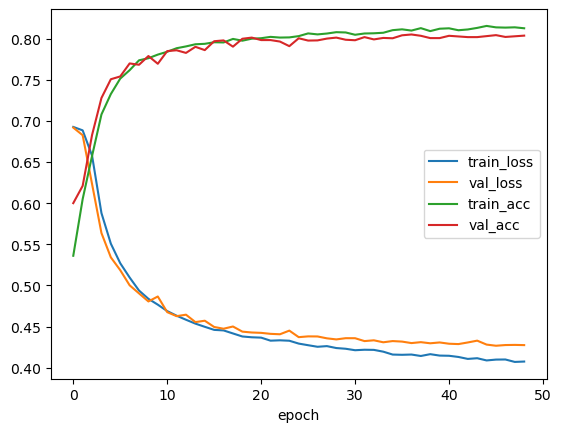

In [25]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# GRU(Grated Recurrent Unit) 구조

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음
    - GRU와 LSTM 중 어떤 것이 더 낫다라고 말할 수는 없음

<img src = "./image/gru.png" height = 500 width = 500>

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
    
- reset_gate
    - 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할을 수행
    
- update_gate
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [26]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

In [27]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- GRU 파라미터 수
    - ((16 * 8) + (8 * 8) + 8 + 8) * 3 = 624

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.h5",
                                                save_best_only = True)

In [31]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, y_val),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 35ms/step - loss: 0.6927 - accuracy: 0.5161 - val_loss: 0.6916 - val_accuracy: 0.5372
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6908 - accuracy: 0.5594

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 10s 32ms/step - loss: 0.6902 - accuracy: 0.5631 - val_loss: 0.6889 - val_accuracy: 0.5954
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6871 - accuracy: 0.5908 - val_loss: 0.6850 - val_accuracy: 0.6084
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6824 - accuracy: 0.6026 - val_loss: 0.6794 - val_accuracy: 0.6174
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6755 - accuracy: 0.6178 - val_loss: 0.6708 - val_accuracy: 0.6240
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6648 - accuracy: 0.6260 - val_loss: 0.6574 - val_accuracy: 0.6448
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6476 - accuracy: 0.6497 - val_loss: 0.6354 - val_accuracy: 0.6662
Epoch 8/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6175 - accuracy: 0.6778 - val_loss: 0.5949 - val_accuracy: 0.6998

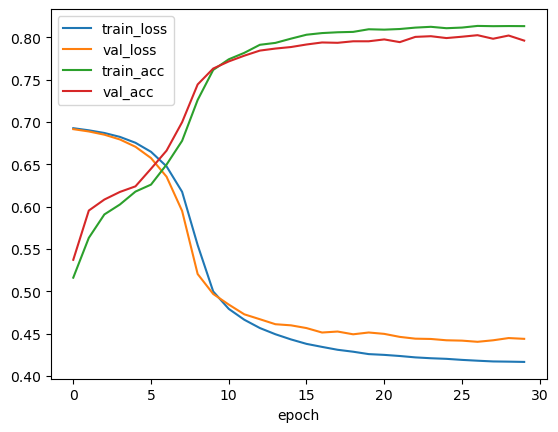

In [32]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

# best model 검증

In [33]:
test_seq = pad_sequences(x_test, maxlen = 100)

In [34]:
rnn_model = keras.models.load_model("./model/best-2rnn-model.h5")

In [35]:
rnn_model.evaluate(test_seq, y_test)

782/782 [==============================] - 10s 12ms/step - loss: 0.4230 - accuracy: 0.8031


[0.4229845404624939, 0.8030800223350525]